## Kaggle: Student Grade Prediction

#### Predict the final grade of Portugese high school students
https://www.kaggle.com/dipam7/student-grade-prediction

#### Information about the features (taken from Kaggle)  <br />
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) <br />
sex - student's sex (binary: 'F' - female or 'M' - male)  <br />
age - student's age (numeric: from 15 to 22)  <br />
address - student's home address type (binary: 'U' - urban or 'R' - rural)  <br />
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  <br />
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  <br />
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  <br />
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  <br />
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  <br />
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  <br />
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') <br />
guardian - student's guardian (nominal: 'mother', 'father' or 'other')  <br />
traveltime - home to school travel time (numeric: 1 - 1 hour)  <br />
studytime - weekly study time (numeric: 1 - 10 hours)  <br />
failures - number of past class failures (numeric: n if 1<=n<3, else 4)  <br />
schoolsup - extra educational support (binary: yes or no)  <br />
famsup - family educational support (binary: yes or no)  <br />
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  <br />
activities - extra-curricular activities (binary: yes or no)  <br />
nursery - attended nursery school (binary: yes or no)  <br />
higher - wants to take higher education (binary: yes or no)  <br />
internet - Internet access at home (binary: yes or no)  <br />
romantic - with a romantic relationship (binary: yes or no)  <br />
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  <br />
freetime - free time after school (numeric: from 1 - very low to 5 - very high)  <br />
goout - going out with friends (numeric: from 1 - very low to 5 - very high)  <br />
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  <br />
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  <br />
health - current health status (numeric: from 1 - very bad to 5 - very good)  <br />
absences - number of school absences (numeric: from 0 to 93)  <br />

## 1 Data Pre-Processing

Steps taken:
1. Firstly, we removed the the columns G1, G2, and G3 from the feature dataset and put them into the label dataset. Here, G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades.
2. Secondly, we separated the train, validation, and test. Here, we first split 30% of the dataset into the test dataset, and then split 50% of the test dataset to be the validation dataset.
3. Then, we took a look at the data with pandas profiling as well as .describe(). According to the result, we then separated the columns into Continuous columns, Ordinal columns, and Binary and nominal columns.
4. After that, we created dummy variables for all the categorical columns.
5. Then, we applied z-score normalization for all the continuous columns.
6. Lastly, we removed minimum value for ordinal columns so that they all started from 0.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('portugues-students.csv')

In [2]:
df.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...      5        3      3     1     1      3        4   5   5   6  
2  ...      4        3      2     2     3      3       10   7   8  10  
3  ...      3        2      2     1     1      5        2  15  14  15  
4  ...      4        3      2     1     2      5        4   6  10  10  
5  ...      5        4      2     1     2      5       10  15  15  15  
6  ...      4        4      4     1     1      3        0  12  12  11  
7  ...      4        1      4     1     1      1        6   6   5   6  
8  ...      4        2      2     1     1      1        0  16  18  19  
9  ...      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

In [3]:
# To separate features as X, labels as y.

X = df.drop(['G1', 'G2', 'G3'], axis=1)
y = df[['G1', 'G2', 'G3']]

In [4]:
X.head(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        6  
1    yes      yes        no       5         3     3    1    1      3        4  
2    yes      yes        no       4         3     2    2    3      3       10  
3    yes      yes       yes       3         2     2    1    1      5        2  
4    yes       no        no       4         3     2    1    2      5        4  

[5 rows x 30 columns]

### 1.1 To separate train, validation and test
- We need test set so that: 
1. We are generalizing; 
2. We are able to improve the model without affecting the performance on the population
- We need validation because otherwise we may tweak our model to make it look good for the test data, which will introduce bias

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
     X_test, y_test, test_size=0.5, random_state=42)

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(pd.concat([X_train, y_train]))

prof.to_notebook_iframe()

In [8]:
X_train.describe(include='all') # describe categorical values

school  sex         age address famsize Pstatus        Medu       Fedu  \
count     276  276  276.000000     276     276     276  276.000000  276.00000   
unique      2    2         NaN       2       2       2         NaN        NaN   
top        GP    F         NaN       U     GT3       T         NaN        NaN   
freq      250  150         NaN     220     195     249         NaN        NaN   
mean      NaN  NaN   16.721014     NaN     NaN     NaN    2.739130    2.51087   
std       NaN  NaN    1.289846     NaN     NaN     NaN    1.070628    1.06680   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000    0.00000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000    2.00000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000    2.00000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000    3.00000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000    4.00000   

         Mjob   Fjob  ... higher internet  romantic      famrel    freetime  \
count     276    276  ...    276      276       276  276.000000  276.000000   
unique      5      5  ...      2        2         2         NaN         NaN   
top     other  other  ...    yes      yes        no         NaN         NaN   
freq       94    154  ...    259      233       181         NaN         NaN   
mean      NaN    NaN  ...    NaN      NaN       NaN    3.956522    3.253623   
std       NaN    NaN  ...    NaN      NaN       NaN    0.860187    1.020243   
min       NaN    NaN  ...    NaN      NaN       NaN    1.000000    1.000000   
25%       NaN    NaN  ...    NaN      NaN       NaN    4.000000    3.000000   
50%       NaN    NaN  ...    NaN      NaN       NaN    4.000000    3.000000   
75%       NaN    NaN  ...    NaN      NaN       NaN    5.000000    4.000000   
max       NaN    NaN  ...    NaN      NaN       NaN    5.000000    5.000000   

             goout        Dalc        Walc      health    absences  
count   276.000000  276.000000  276.000000  276.000000  276.000000  
unique         NaN         NaN         NaN         NaN         NaN  
top            NaN         NaN         NaN         NaN         NaN  
freq           NaN         NaN         NaN         NaN         NaN  
mean      3.144928    1.496377    2.322464    3.539855    5.923913  
std       1.128479    0.892385    1.307740    1.427727    8.703897  
min       1.000000    1.000000    1.000000    1.000000    0.000000  
25%       2.000000    1.000000    1.000000    3.000000    0.000000  
50%       3.000000    1.000000    2.000000    4.000000    4.000000  
75%       4.000000    2.000000    3.000000    5.000000    8.000000  
max       5.000000    5.000000    5.000000    5.000000   75.000000  

[11 rows x 30 columns]

### 1.2 Pre-process different types of variable differently

- When we separated the columns, Ordinal columns are really categorical columns with numeric value; and Binary and nominal columns are categorical columns with characters/strings values.
- Standardization with z-score/standard score makes the numeric values into standard normal distribution with mean 0 and standard deviation 1. We do that so the magnitude of the data would affect the model
- We created dummy variables for all the categorical columns. The dummy variables act like 'switches' that turn various parameters on and off in an equation. Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don't need to write out separate equation models for each subgroup.

##### Numeric:
- From the features, we know that 'school', 'sex', 'address', 'famsize','Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' are binary.
- 'Mjob', 'Fjob', 'reason', 'guardian' are nominal.
- These two kinds of variables are great candidates for being one hot encoded.

In [9]:
X_train.describe() # describe numeric and categorical values that have numbers

age        Medu       Fedu  traveltime   studytime    failures  \
count  276.000000  276.000000  276.00000  276.000000  276.000000  276.000000   
mean    16.721014    2.739130    2.51087    1.402174    2.072464    0.340580   
std      1.289846    1.070628    1.06680    0.677854    0.836770    0.738513   
min     15.000000    0.000000    0.00000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.00000    1.000000    2.000000    0.000000   
50%     17.000000    3.000000    2.00000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.00000    2.000000    2.250000    0.000000   
max     22.000000    4.000000    4.00000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     3.956522    3.253623    3.144928    1.496377    2.322464    3.539855   
std      0.860187    1.020243    1.128479    0.892385    1.307740    1.427727   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences  
count  276.000000  
mean     5.923913  
std      8.703897  
min      0.000000  
25%      0.000000  
50%      4.000000  
75%      8.000000  
max     75.000000

Looking at the numeric data, we can see most of the features are actually ordinal.

We can then handle numeric data by separating the continuous variables - traveltime, studytime, freetime from the ordinal variables. Although # of absences is not continuous (ie. you can't have 5,5 absences), we will treat it as so given the large range (0 to 75).

For age, we will subtract the minimum value so we have the age starting at 0. This will make sure the magnitude is not affecting the results.

### 1.3 Pre-process the training set first
We will go through a **separate process for test and validation**, because:
- The first reason is that we need to know what’s going on within and take control of each step of the data preprocessing. Doing it step by step for the training set, we can get instant feedback with output and visualizations, which allow us to achieve this goal. Then applying the same steps to test and validation set would be much faster with just a function defined (preprocess_data)
- The second reason is that the there is a chance a value that appears on the training set won't appear on the test set, and vice-versa. So when we create dummies for the test and validation set, we need to align them with the dummies in the training set.
- Last but certainly not least, we preprocess the train data first so we can learn the parameters from the population without "peaking" on the test/validation data. We then use the parameters (like mean and standard deviation) to preprocess val and test.

In [10]:
# Preprocess the training data

all_cols = X_train.columns

numerical_columns = X_train._get_numeric_data().columns

# 'absences' is not continuous but we will treat it as such, reasons are stated above
continuous_columns = ['traveltime', 'studytime', 'freetime', 'absences']
ordinal_columns = [col for col in numerical_columns if col not in continuous_columns]

# remove the numerical columns to get the categorical ones. This is missing the ordinal columns
categorical_columns = [col for col in all_cols if col not in numerical_columns]


print("Continuous:", continuous_columns)
print("Ordinal:", ordinal_columns)
print('Binary and nominal columns:', categorical_columns)

Continuous: ['traveltime', 'studytime', 'freetime', 'absences']
Ordinal: ['age', 'Medu', 'Fedu', 'failures', 'famrel', 'goout', 'Dalc', 'Walc', 'health']
Binary and nominal columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [11]:
# creates one hot encoding for the categorical features. 
train_one_hot_features = pd.get_dummies(X_train[categorical_columns], drop_first=True)

# use z-score for the continuous variables. We save the statistics to apply z-score to validation and test
train_continuous_mean = X_train[continuous_columns].mean()
train_continuous_std_dev = X_train[continuous_columns].std()

train_z_scored_continuous_variables = (X_train[continuous_columns] - train_continuous_mean) / train_continuous_std_dev

# for the ordinal ones, remove the minimum value so they all start from 0; also save the minimum
train_ordinal_values_mins = X_train[ordinal_columns].min()

train_preprocessed_ordinal_values = X_train[ordinal_columns] - train_ordinal_values_mins


In [12]:
final_X_train = pd.concat([train_preprocessed_ordinal_values, 
                           train_z_scored_continuous_variables, 
                           train_one_hot_features], axis = 1)

In [13]:
final_X_train.head()

age  Medu  Fedu  failures  famrel  goout  Dalc  Walc  health  traveltime  \
17     1     3     3         0       4      1     0     0       3    2.357183   
165    1     3     2         1       3      1     0     0       1    0.881939   
24     0     2     4         0       3      1     0     0       4   -0.593305   
126    0     3     4         0       4      1     0     0       0   -0.593305   
346    3     4     3         0       4      1     0     1       3   -0.593305   

     ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
17   ...                1               0              1           1   
165  ...                1               0              0           1   
24   ...                1               0              1           1   
126  ...                1               0              1           0   
346  ...                1               0              0           0   

     paid_yes  activities_yes  nursery_yes  higher_yes  internet_yes  \
17          0               1            1           1             0   
165         0               1            0           0             0   
24          1               1            1           1             1   
126         0               1            1           1             1   
346         0               0            1           1             1   

     romantic_yes  
17              0  
165             0  
24              0  
126             1  
346             1  

[5 rows x 39 columns]

We can analyze how the features correlate to the labels by concatenating X and y and plotting a correlation matrix

### 1.4 Correlation matrix

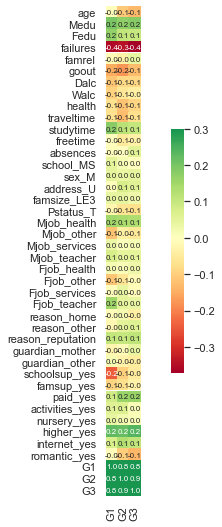

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

def generate_corr_matrix(X, y):
    # compute the correlation matrix
    corr = pd.concat([X, y], axis=1).corr()
    corr = corr[y_train.columns] # only shows the correlation for the labels

    # set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, vmax=.3, center=0,
                square=True, linewidths=0.0001, cbar_kws={"shrink": .5},
               annot = True, cmap ='RdYlGn', ax = ax, fmt='.1f', annot_kws={"fontsize":8})
    
generate_corr_matrix(final_X_train, y_train)

We can also analyze the distribution of grade scores. We can see that the grades were much worse on the first period. We will try to predict the final grade -> G3

##### Conclusion from the correlation matrix:
- High correlation (partial or not): higher_yes; paid_yes; study_time; goout; failures; Fedu; Medu; Fjob_teacher; schoolsup_yes
- Feature (goou, schoolsup_yes) negatively affect grade first and second year grade more than last year
- Feature (Fedu, studytime, Fjob_teacher Mjob_health) positively affect grade in the first year, not so much in second and third year
- Most useful features (Menu, failures, higher_yes). Because they affect grades across all years.

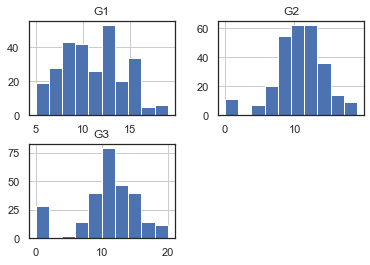

In [15]:
y_train.hist()
pass

In [16]:
final_y_train = y_train['G3']

In [17]:
# Use this function to preprocess the validation and test sets

def preprocess_data(X, y):
    
    # One-Hot: For val and test, we do an additional step for the one-hot. 
    # There is a chance a value that appears on the training set won't appear on the test set, and vice-versa.
    # We compute the dummies, be then we align the dummies to the train_dummies, dropping additional columns
    # and adding new columns that were not present on X
    temporary_one_hot = pd.get_dummies(X[categorical_columns])
    
    # We align the columns by adding any missing column to X.
    # detail reference document: https://stackoverflow.com/questions/51645195/pandas-align-function-illustrative-example
    _, one_hot_values = train_one_hot_features.align(temporary_one_hot, 'left', axis=1)
    one_hot_values.fillna(0, inplace=True)
    
    # The z-score is using the mean and standard deviation values of train set
    z_scored_continuous_variables = (X[continuous_columns] - train_continuous_mean) / train_continuous_std_dev

    # For the ordinal ones, we remove the minimum value so they all start from 0; we also save the minimum
    preprocessed_ordinal_values = X[ordinal_columns] -train_ordinal_values_mins    
    
    final_X = pd.concat([preprocessed_ordinal_values, 
                           z_scored_continuous_variables, 
                           one_hot_values], axis = 1)
    
    final_y = y['G3']
    
    return final_X, final_y

final_X_test, final_y_test = preprocess_data(X_test, y_test)
final_X_val, final_y_val = preprocess_data(X_val, y_val)

## 2 Model Building

We will be using 2 models:
#### Linear Regression: SGDRegressor 
- The SGDRegressor is a linear model and the defaul configuration is the same as Linear Regression. We will use it instead of LinearRegression because we will be able to modify the regularization. 
- Note that SGDRegressor is not a model, it is a framework to train linear models that are trained with Stochastic Gradient Descent.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

#### KNN Regressor 
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor 




### 2.1 Linear Regression with Stochastic Gradient Descent

In [18]:
from sklearn.linear_model import SGDRegressor

CPU times: user 104 ms, sys: 1.87 ms, total: 106 ms
Wall time: 109 ms


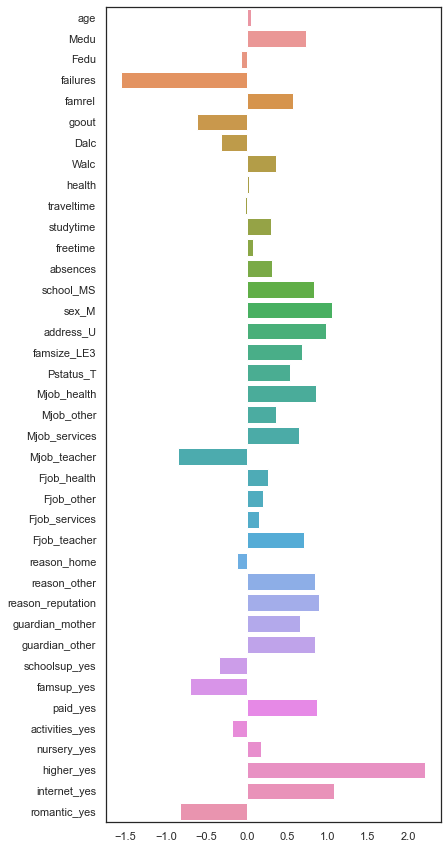

In [19]:
%%time

np.random.seed(50)

# Creates a linear regression model using SGDRegressor
lr = SGDRegressor(alpha=0) 

# Train the linear regresssion model 
lr.fit(final_X_train, final_y_train)

# Plot the coeficients
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(y=final_X_train.columns, x=list(lr.coef_))
pass

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, max_error

def report_regression_metrics(model, X, y, plots=False):
    y_pred = model.predict(X)
    if plots:
        plt.figure()
        sns.distplot(y - y_pred) # plot distribution of errors
        plt.figure()
        sns.scatterplot(x=y, y=y_pred)
        pass
        
    print("MSE:", mean_squared_error(y, y_pred))
    print("R2 score:", r2_score(y, y_pred))
    print("Max error:", max_error(y, y_pred))
    print() 

In [21]:
%%time
print("Train metrics:")
report_regression_metrics(lr, final_X_train, final_y_train)

print("Val metrics:")
report_regression_metrics(lr, final_X_val, final_y_val)

print("Test metrics:")
report_regression_metrics(lr, final_X_test, final_y_test)

Train metrics:
MSE: 15.664198519444172
R2 score: 0.2351463213409154
Max error: 11.473196385533136

Val metrics:
MSE: 20.390503428831554
R2 score: 0.1490715894722392
Max error: 11.493858549414394

Test metrics:
MSE: 15.915977839305874
R2 score: 0.20534893734742676
Max error: 9.368953249064882

CPU times: user 8.7 ms, sys: 1.56 ms, total: 10.3 ms
Wall time: 10.7 ms


Train metrics:
MSE: 18.901939890728933
R2 score: 0.07705343230481987
Max error: 12.537958286430694

Val metrics:
MSE: 22.825658153168906
R2 score: 0.04744867730619595
Max error: 11.658686457323043

Test metrics:
MSE: 16.721922328390004
R2 score: 0.16510983603955387
Max error: 10.549739237164777



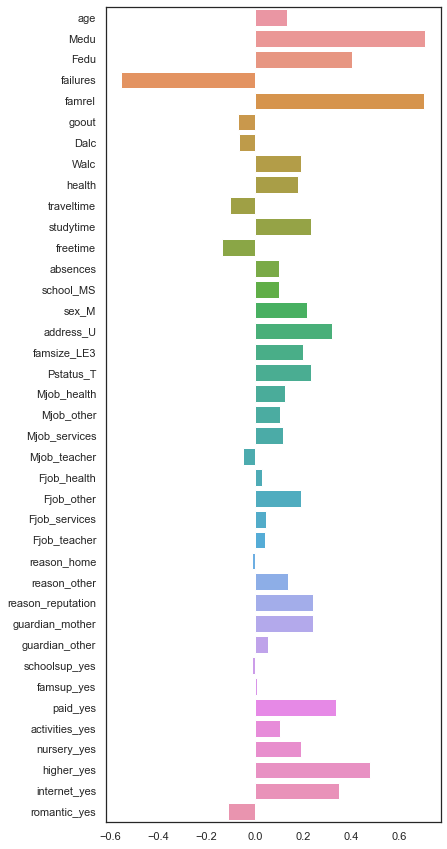

In [22]:
# With regularization

lr_reg = SGDRegressor(alpha=1) # creates a linear regression model using SGDRegressor

# Train the linear regression model below
lr_reg.fit(final_X_train, final_y_train)

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(y=final_X_train.columns, x=list(lr_reg.coef_))

print("Train metrics:")
report_regression_metrics(lr_reg, final_X_train, final_y_train)

print("Val metrics:")
report_regression_metrics(lr_reg, final_X_val, final_y_val)

print("Test metrics:")
report_regression_metrics(lr_reg, final_X_test, final_y_test)

### 2.2 KNN Regressor 

In [34]:
from sklearn.neighbors import KNeighborsRegressor

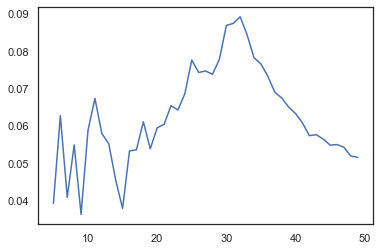

In [35]:
# Cross-validation tuning
from sklearn.model_selection import cross_val_score

cross_val_scores = []

for n in range(5,50):
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(final_X_train, final_y_train)

    knn_scores = cross_val_score(knn, final_X_train, final_y_train, scoring = "r2")
    
    cross_val_scores.append(knn_scores.mean())

    
sns.lineplot(x = list(range(5,50)), y= cross_val_scores)

pass

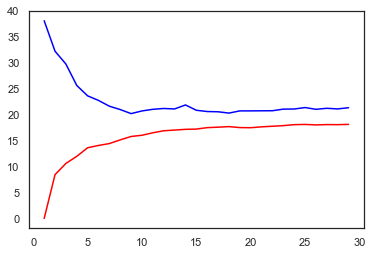

In [36]:
# MSE comparison

MSE_train = []
MSE_val = []

for n in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(final_X_train, final_y_train)

    y_pred_train = knn.predict(final_X_train)
    y_pred_val = knn.predict(final_X_val)

    r2_train = mean_squared_error(final_y_train, y_pred_train)
    r2_val = mean_squared_error(final_y_val, y_pred_val)

    MSE_train.append(r2_train)
    MSE_val.append(r2_val)

sns.lineplot(x = list(range(1,30)), y= MSE_train, color = 'red')
sns.lineplot(x = list(range(1,30)), y= MSE_val, color = 'blue')

pass

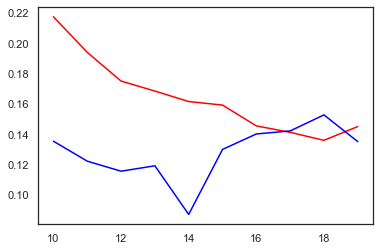

In [37]:
# r_2 comparison

r_scores_train = []
r_scores_val = []

for n in range(10,20):
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(final_X_train, final_y_train)

    y_pred_train = knn.predict(final_X_train)
    y_pred_val = knn.predict(final_X_val)

    r2_train = r2_score(final_y_train, y_pred_train)
    r2_val = r2_score(final_y_val, y_pred_val)

    r_scores_train.append(r2_train)
    r_scores_val.append(r2_val)

sns.lineplot(x = list(range(10,20)), y = r_scores_train, color = 'red')
sns.lineplot(x = list(range(10,20)), y = r_scores_val, color = 'blue')

pass

In [38]:
%%timeit

knn = KNeighborsRegressor(n_neighbors = 18)

knn.fit(final_X_train, final_y_train)

1.52 ms ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%%time

print("Train metrics:")
report_regression_metrics(knn, final_X_train, final_y_train)

print("Val metrics:")
report_regression_metrics(knn, final_X_val, final_y_val)

print("Test metrics:")
report_regression_metrics(knn, final_X_test, final_y_test)

Train metrics:
MSE: 17.507396924806297
R2 score: 0.14514637151330023
Max error: 12.052631578947368

Val metrics:
MSE: 20.72308559087281
R2 score: 0.13519240245248698
Max error: 11.368421052631579

Test metrics:
MSE: 17.62594644506002
R2 score: 0.1199738266640401
Max error: 11.736842105263158

CPU times: user 20.6 ms, sys: 2.01 ms, total: 22.6 ms
Wall time: 19.4 ms


## 3 Conclusion

### 3.1 SGDRegressor model performs better
- With a for loop, I fit the KNNRegressor model with the goal to optimize R^2 score for the training set and validation set, which was 0.136 and 0153 respectively. However, the R^2 score dropped to 0.102 when it comes ti testing set.
- On the other hand, SGDRegressor is a Linear model fitted by minimizing a regularized empirical loss with Stochastic Gradient Descent. So I believe I don’t need to do my manual tuning here. The R^2 score is 0.205 for the test set. Also the MSE is smaller than the result with KNNRegressor 
- Thus, I believe SGDRegressor performs better.

### 3.2 SGDRegressor is slower than KNN Regressor
- Training: SGDRegressor is way slower than KNN. I think this is because SGDRegressor includes training model, while I gave a fix n_neighbors to KNN.
- Inference: SGDRegressor is faster.

### 3.3 Regularization
- When I changed the regularization alpha to 1, the maximum coefficients of the labels decreased, and the the coefficients are more spread out (not just a couple with very high coefficients), which means less emphasizes are placed on specific features. In addition, the metrics scores decreased. 

### 3.4 Main factors that contribute to good and poor academic performance
1. number of past class failures
2. Internet access at home
3. Wether students want to take higher education
